Assignment Content:

1. Implement Linear Regression using Jupyter Notebook and Python as well as the sklearn package using any dataset of your choosing (you can use the UCI dataset repository (Links to an external site.)Links to an external site. or any other legitimate data repository). Try to predict one of the variables (columns) based on another variable as shown in the lectures. Report the resulting line-of-fit equation in y = mx + b form with the estimated m and b parameters and plot the line-of-fit to the data (2D plot is fine). You may include all of this working code and information in a Jupyter Notebook file (.ipynb) and turn this in on Canvas.

Note: You may also use the iris dataset from the sklearn package if you are not able to find a good dataset of your choosing, import and use it as a data-frame the following way:

from sklearn.datasets import load_iris

import pandas as pd

iris = load_iris()

iris_dataframe = pd.DataFrame(iris.data, columns=iris.feature_names)

Note: Please don't choose datasets that are too large as the graders may need extra time to compute the work or download the data. If you can, please include the dataset along with the code or provide a link to where the dataset was downloaded from.

2. Complete the Machine Learning Principles course assessment survey (you won't need to study for this, we merely use it as feedback to improve the course based on your input, so be honest)

 Deliverables:

-Upload one .ipynb file on Canvas with the solution to 1.

-Completed Course Assessment Survey on Canvas

In [1]:
# Import key libraries

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from pprint import PrettyPrinter


In [2]:
# Load and inspect data

bostonData = load_boston()

X = bostonData.data
y = bostonData.target
df = pd.DataFrame(np.c_[X, y]
                     ,columns = bostonData.feature_names.tolist() + ['MEDV'])
print('Dataset dimensions: {0}'.format(df.shape))
df[:5]


Dataset dimensions: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


_Column details from DESCR method associated with Boston housing sklearn dataset_

Attribute Information:

- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per \$10,000
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
- MEDV     Median value of owner-occupied homes in \$1000's

In [3]:
# Run this to show all detail includes with Boston Housing Market dataset

printer = PrettyPrinter()
printer.pprint(bostonData.DESCR)


('Boston House Prices dataset\n'
 '===========================\n'
 '\n'
 'Notes\n'
 '------\n'
 'Data Set Characteristics:  \n'
 '\n'
 '    :Number of Instances: 506 \n'
 '\n'
 '    :Number of Attributes: 13 numeric/categorical predictive\n'
 '    \n'
 '    :Median Value (attribute 14) is usually the target\n'
 '\n'
 '    :Attribute Information (in order):\n'
 '        - CRIM     per capita crime rate by town\n'
 '        - ZN       proportion of residential land zoned for lots over 25,000 '
 'sq.ft.\n'
 '        - INDUS    proportion of non-retail business acres per town\n'
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; '
 '0 otherwise)\n'
 '        - NOX      nitric oxides concentration (parts per 10 million)\n'
 '        - RM       average number of rooms per dwelling\n'
 '        - AGE      proportion of owner-occupied units built prior to 1940\n'
 '        - DIS      weighted distances to five Boston employment centres\n'
 '        - RAD      index o

In [4]:
# Select columns describing LSTAT - '% lower status of the population' and
# MEDV - 'median value of owner-occupied homes in $1,000's'

X = df.iloc[:,-2].values.reshape(-1, 1)
y = df.iloc[:,-1].values.reshape(-1, 1)


In [5]:
# Build linear regression model using LSTAT to predict MEDV

linModel = LinearRegression()
linModel.fit(X,y)


/Users/petersontylerd/.ve/main/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
# Display model coefficient and intercept

print('Model coefficient: {0}'.format(np.round(linModel.coef_[0][0], 3)))
print('Model intercept: {0}'.format(np.round(linModel.intercept_[0], 3)))


Model coefficient: -0.95
Model intercept: 34.554


__Line of best fit equation__

$$
y = -0.95x + 34.554
$$

> Remarks - This the coefficient for LSTAT in this equation can be interpreted as for every 1 unit increase of LSTAT, the MEDV prediction
decreases by -0.95

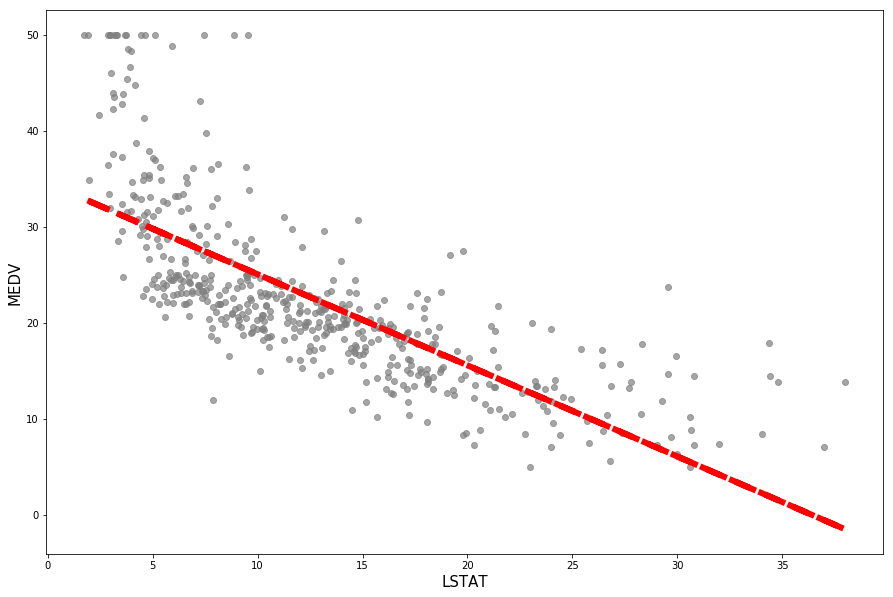

In [7]:
# Scatter plot

fig, ax = plt.subplots(figsize = (15,10))
plt.scatter(X, y, alpha = 0.7, color = 'grey')
plt.ylabel('MEDV', fontsize = 15)
plt.xlabel('LSTAT', fontsize = 15)

ax.plot(X, linModel.predict(X), color = 'r', linestyle = '--', linewidth = 6)
plt.show()


> Remarks - The line of best fit for the independent variable LSTAT and the dependent variable MEDV somewhat captures the relationship between these variables. While it's clear that as LSTAT increases, MEDV decreases, there are appears to be a segment of LSTAT where the relationship would be better capture by a curved (polynomial) line. Specifically, LSTAT values of 10% and below are paired with MEDV values that decrease more sharply than the other values.